In [51]:
import tensorflow as tf
from tensorflow.keras import models,layers
import  matplotlib.pyplot as plt

In [94]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "DATA",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    
)

Found 2152 files belonging to 3 classes.


In [54]:
class_names  = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [55]:
len(dataset)

68

In [56]:
for image_batch ,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 2 1 1 0 0 0 0]


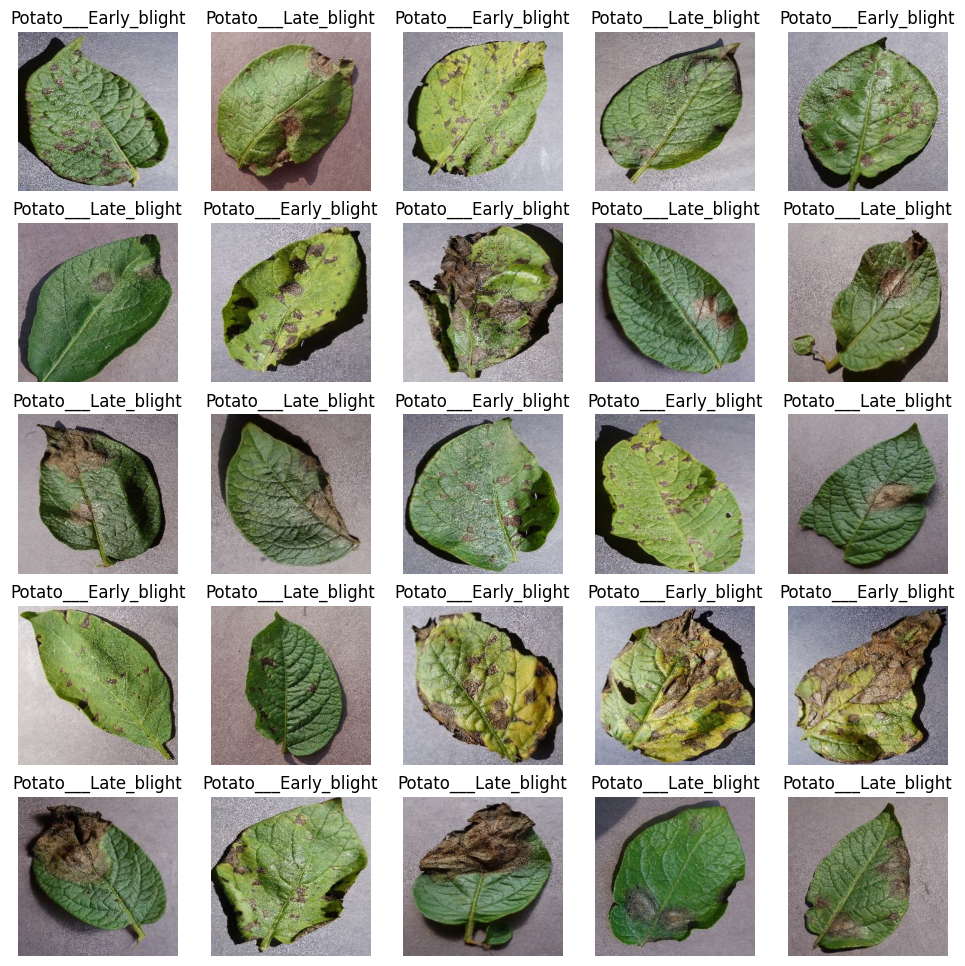

In [57]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i].numpy()])
    plt.axis ('off')

Spliting Data Into Traning & Testing:

In [ ]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [59]:
train_ds = dataset.take(54)
len(train_ds)

54

In [60]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [62]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "DATA",
    validation_split=0.2,      # 20% for validation
    subset="training",
    seed=123,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    "DATA",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    
)


Found 2152 files belonging to 3 classes.
Using 1722 files for training.
Found 2152 files belonging to 3 classes.
Using 430 files for validation.


In [67]:
len(train_dataset)

54

In [83]:
num_classes = len(class_names)

In [76]:
def get_dataset_partitions_tf(ds,train_split = 0.8,val_split = 0.1,shuffle = True , shuffle_size = 1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds ,val_ds , test_ds

In [72]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [73]:
len(train_ds)

54

In [74]:
len(val_ds)

6

In [75]:
len(test_ds)

8

In [77]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)




In [79]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [80]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [ ]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)

In [96]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPool2D((2,2)), #1st layer
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)), #2nd layer
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)), #3rd layer
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)), #4rth layer
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)), #5th layer
    
    layers.Flatten(),
    
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes , activation='softmax')
    
])
model.build(input_shape=input_shape)

C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (32, 28, 28, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (32, 14, 14, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (32, 12, 12, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (32, 6, 6, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (32, 1152)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (32, 64)               │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,179 (633.51 KB)

 Trainable params: 162,179 (633.51 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
model.compile(
    optimizer = 'adam',
    loss = 'SparseCategoricalCrossentropy',
    metrics = ['accuracy']
)

In [99]:
model.fit(train_ds,epochs = 20,validation_data=val_ds) 

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.5434 - loss: 0.8734 - val_accuracy: 0.6042 - val_loss: 0.8709
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7529 - loss: 0.5372 - val_accuracy: 0.7396 - val_loss: 0.7662
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.8825 - loss: 0.2891 - val_accuracy: 0.8281 - val_loss: 0.3729
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9138 - loss: 0.2241 - val_accuracy: 0.8958 - val_loss: 0.2443
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9178 - loss: 0.1970 - val_accuracy: 0.8490 - val_loss: 0.2910
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9369 - loss: 0.1833 - val_accuracy: 0.9427 - val_loss: 0.1284
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9381 - loss: 0.1609 - val_accuracy: 0.9479 - val_loss: 0.1557
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9329 - loss: 0.1653 - val_accuracy: 0.9531 - val_loss:

In [100]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 364ms/step - accuracy: 0.9727 - loss: 0.0883


[0.08827821165323257, 0.97265625]

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
predicted label: Potato___Late_blight


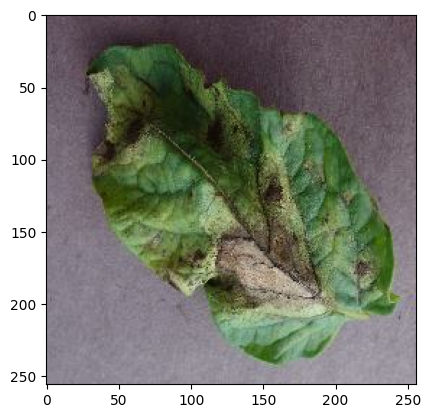

In [101]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [140]:

def predict_and_show(model, test_ds, class_names, num_images=6):
    plt.figure(figsize=(13, 13))
    
    # Take one batch from the dataset
    for images, labels in test_ds.take(1):
        for i in range(num_images):
            ax = plt.subplot(3, 3, i + 1)
            img = images[i].numpy().astype("uint8")

            # Predict
            preds = model.predict(tf.expand_dims(img, 0), verbose=0)
            pred_class = class_names[np.argmax(preds[0])]
            confidence = round(100 * np.max(preds[0]), 2)
            actual_class = class_names[labels[i]]

            # Show
            plt.imshow(img)
            plt.title(f"Actual: {actual_class}\nPredicted: {pred_class}\nAccuracy{confidence:.2f}%", fontsize=9, pad=2)

            plt.axis("off")


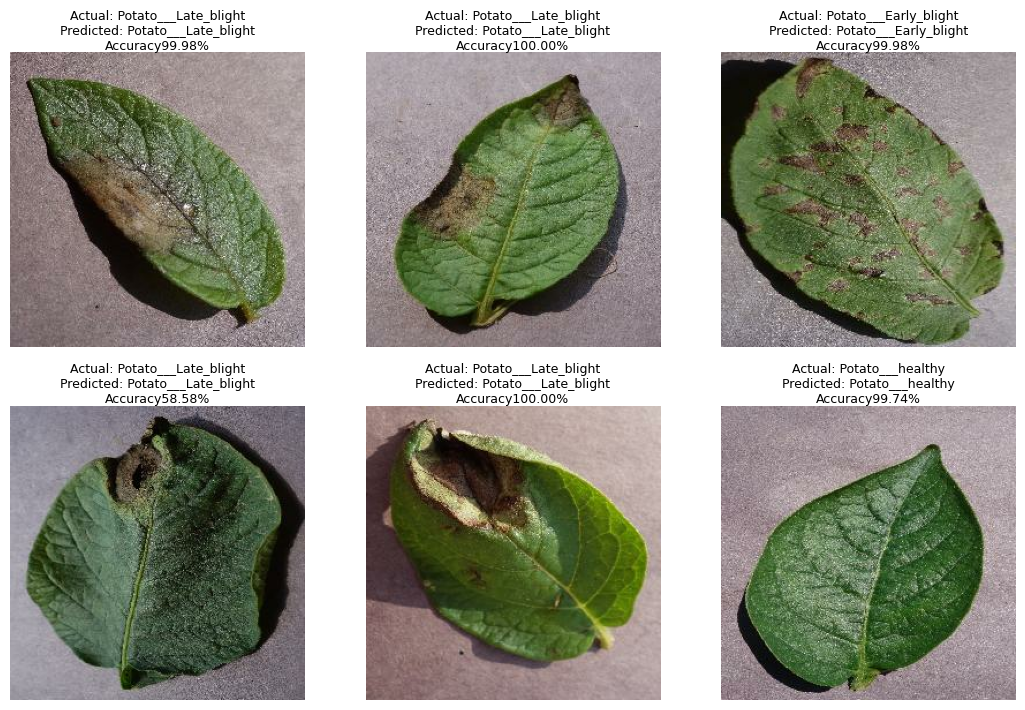

In [141]:
predict_and_show(model, test_ds, class_names)


In [ ]:
#model.save("my_model.h5")
